# 3.1  Churn Prediction Project
- Dataset Link: https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/chapter-03-churn-prediction

# 3.2 Data Prep
- Import relevant libraries
- Download data and read with pandas - make sure to catch empty strings in columns
- Inspect Data
- Make columns names and values look uniform
- Check if all column names read correctly
- Check for missingness 
- Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=['', ' '])
print(df.head(n=5))
print(df.shape)

--2025-10-29 15:00:38--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv.1’

WA_Fn-UseC_-Telco-C 100%[===================>] 954.59K  --.-KB/s    in 0.009s  

2025-10-29 15:00:38 (101 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv.1’ saved [977501/977501]

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No     

In [3]:
df.columns = df.columns.str.lower()
df.columns
#transpose data to see all columns well
#df.head().T

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [4]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [5]:
# format values in string columns
string_cols = list(df.dtypes[df.dtypes=='object'].index)
string_cols

for col in string_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
# --> Check Missingness
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [7]:
# Replace missingness with in total charges with median value
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].median())
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [8]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [9]:
# # --> Some variables were incorrectly coded 
# # --> totalcharges and seniorcitizen
# # -> totalcharges should be number instead of object
# # -> seniorcitizen should be .... instead of .... 

# df.isnull().sum()

#--> Convert totalcharges column to numeric(float64) and treat foreign entries as nan -  it initially read as objects due to non-numeric entires like empty spaces present in them, 

#--> df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [10]:
# Inspect the Churn variable
df.churn = (df.churn == 'yes').astype(int)
df['churn'].value_counts()  #imbalanced

churn
0    5174
1    1869
Name: count, dtype: int64

# 3.3  Setting up the Validation Framework
- Perform train/validation/test split with scikit learn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#train_test_split?

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

In [13]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(4225, 1409)

In [14]:
# needed splits
len(df_train), len(df_val), len(df_test)


(4225, 1409, 1409)

In [15]:
#Reset Indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
#get target variables
y_train = df_train['churn'].values
y_val = df_val.churn.values
y_test = df_test.churn.values 

print(type(y_train))
print(type(y_val))

#drop churn variable in train
del df_train['churn']
del df_val['churn']
del df_test['churn']

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
y_train


array([0, 0, 1, ..., 1, 0, 1], shape=(4225,))

In [18]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [19]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(4225, 20)
(1409, 20)
(1409, 20)


In [20]:
#train_test_split?

# 3.4 EDA
- Check Missing Values
- Look at target variable(Churn)
- Look at numerical and categorical variables

In [21]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [22]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [23]:
df_full_train['churn'].value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [24]:
df_full_train['churn'].value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [25]:
global_churn_rate = df_full_train['churn'].mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [26]:
# Check categorical & numerical variables
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
               'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
               'paymentmethod']

In [27]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature Importance: Churn Rate & Risk Ratio

- Churn rate
- Risk Ratio
- Mutual information - later

## Churn Rate
- Subtract group churn from global churn (global_churn - group_churn)
    - If result is more than zero(positive), then group is less likely to churn
    - If result is < 0, the group is more likely to churn

In [28]:
# Churn rate with different groups
# churn rate in female
churn_female = df_full_train[df_full_train.gender == 'female']['churn'].mean()
float(churn_female)

0.27682403433476394

In [29]:
# Churn rate in males
churn_male = df_full_train[df_full_train['gender']=='male']['churn'].mean()
float(round(churn_male, 2))


0.26

In [30]:
#Global Churn
float(global_churn_rate)

0.26996805111821087

In [31]:
#Churn rate among individuals with partners
churn_partner = df_full_train[df_full_train['partner']=='yes'].churn.mean()
float(round(churn_partner, 2))

0.21

In [32]:
#churn rate among individuals without partner
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
float(round(churn_no_partner, 2))

0.33

In [33]:
#churnrate among male senior citizens with montly contract
churn_male_senior_citizens_monthly_contract = df_full_train[
    (df_full_train.gender == 'male') &
    (df_full_train['seniorcitizen'] == 1) &
    (df_full_train.contract == 'month-to-month')
    ].churn.mean()
float(churn_male_senior_citizens_monthly_contract)

#The churn rate for this subgroup is higher than the global churn rate. Hence these groups are more likely to churn

# # Inspect the Churn variable
# df.churn = (df.churn == 'yes').astype(int)
# df['churn'].value_counts()  #imbalanced

0.5292307692307693

In [34]:
float(global_churn_rate - churn_female) #females are slightly likely to churn (weaker)

-0.006855983216553063

In [35]:
float(global_churn_rate - churn_male) #males are less likely to churn 

0.006754520462819769

## Risk Ratio
 - Divide group churn rate by global churn rate (group churn / global churn)
     - If result is > 1, then group is more likely to churn
     - If result is < 1, group is less likely to churn

In [36]:
float(churn_no_partner/ global_churn_rate)
#no partners are likely to churn that those with partners


1.2216593879412643

In [37]:
float(churn_male_senior_citizens_monthly_contract / global_churn_rate)

#male senior citizens with monthly contract are more likely to churn. They are twice as likely to churn

1.9603459262630862

In [38]:
from IPython.display import display

for cols in categorical:
    print(cols)
    df_group = df_full_train.groupby(cols).churn.agg(['mean', 'count'])
    df_group['diff'] = global_churn_rate - df_group['mean']
    df_group['risk'] = df_group['mean'] / global_churn_rate 
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,0.027698,0.897403
1,0.413377,912,-0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,-0.059841,1.221659
yes,0.205033,2702,0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,-0.043792,1.162212
yes,0.165666,1666,0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,0.028652,0.893870
yes,0.273049,5087,-0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,0.012561,0.953474
no_phone_service,0.241316,547,0.028652,0.893870
yes,0.290742,2387,-0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,0.077621,0.712482
fiber_optic,0.425171,2479,-0.155203,1.574895
no,0.077805,1221,0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,-0.150953,1.559152
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.153226,1612,0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,-0.134355,1.497672
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.217232,1915,0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,-0.125907,1.466379
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.230412,1940,0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,-0.148946,1.551717
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.159926,1632,0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,-0.072864,1.269897
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.302723,2167,-0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,-0.068938,1.255358
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.307273,2200,-0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,-0.161733,1.599082
one_year,0.120573,1186,0.149395,0.446621
two_year,0.028274,1344,0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,0.097897,0.637375
yes,0.338151,3321,-0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.101797,0.622928
credit_card_(automatic),0.164339,1217,0.105630,0.608733
electronic_check,0.455890,1893,-0.185922,1.688682
mailed_check,0.193870,1305,0.076098,0.718121


# 3.6

In [39]:
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

 # 3.6 Feature Importance - Mutual Information
 - Tells us how much we can learn about one variable if we know the value of another.
 - Mutual Information between two clusterings - The Mutual Information is a measure of the similarity between two labels of the same data
 - Its all about relative importance

In [40]:
from sklearn.metrics import mutual_info_score
# mutual_info_score?

In [41]:
mutual_info_score(df_full_train.churn, df_full_train.seniorcitizen)

0.009410216144208144

In [42]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

# if somebody tells us about month-to-month contract, we can learn alot from this info (higher churn risk)

0.0983203874041556

In [43]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

#value is low --> implies if someone tells us about gender we know nothing about his/her churn status

0.0001174846211139946

In [44]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)
    

In [45]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

# Scores > 0.05 have strong relevance
# 0.01 > score < 0.05 - moderate relevance
# scores < 0.01 have weak relevance

# These are the kind of signals ml models pick when modelling

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Feature Importance - Correlation

In [46]:
df_full_train[numerical].corrwith(df_full_train.churn)
#the longer people stay(tenure) with the company the lesser they churn

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.197006
dtype: float64

In [47]:
print(df_full_train[df_full_train.tenure <=2].churn.mean())
#churn rate for people with less than 2 years is 60% 

print(df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12) ].churn.mean())

print(df_full_train[df_full_train.tenure > 12].churn.mean() )

#we see the churn rate decreases as tenure increases

#do same for monthly charges

0.5953420669577875
0.3994413407821229
0.17634908339788277


# 3.8 One-hot Encoding
- Scikit learn to encode categorical features with DictVectorizer
- Try ColumnTransformer??

In [48]:
from sklearn.feature_extraction import DictVectorizer
#DictVectorizer is clever enough to identify numeric variables and does not process numeric variables. 

In [49]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records') # Put categorical and numerical into dictionaries

dv = DictVectorizer(sparse=False) #instantiate a DictVectorizer to learn our dictionaries 

#teach the vectorizer what kind of variables we have

In [50]:
X_train = dv.fit_transform(train_dicts) # Now fits & transfrom the dictionaries in train data into a feature matrix
X_train.shape

(4225, 45)

In [51]:
# validation data - apply the fit to validation data.
# We dont fit on the validation data, we only transform it
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records') #convert to dictionaries
X_val = dv.transform(val_dicts) # For validation data, Just transform the dictionaries with the fitted instance into feature matrix. 
X_val.shape

(1409, 45)

In [52]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

# 3.9 Logistic Regression

In [53]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

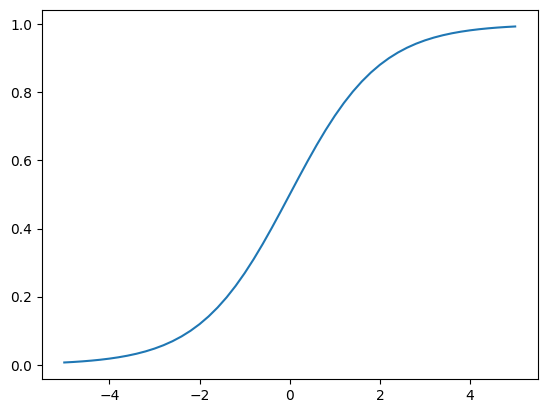

In [54]:
z = np.linspace(-5, 5, 51)
sigmoid(z)
plt.plot(z, sigmoid(z))

# 3.10 Training Logistic Regression with Scikit-Learn
- Train a model with Scikit-learn
- Apply it to the validation dataset
- Evaluate the performance

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression(max_iter=10000)    #model = LogisticRegression(max_iter = 10000) 
model.fit(X_train, y_train,)


# model = LogisticRegression(max_iter = 10000).fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [57]:
model.coef_

array([[ 6.88450778e-01,  3.43735743e-02, -6.77429904e-01,
         5.78175198e-02, -1.24230717e-02,  1.14782008e-01,
        -1.62941340e-01,  9.35537803e-02,  4.18085360e-02,
         3.58591229e-03, -5.06067030e-01,  7.14402819e-01,
        -1.62941340e-01, -1.86169876e-02, -1.85198966e-01,
         6.33810420e-02,  1.67212373e-01,  1.18179666e-01,
        -1.62941340e-01,  9.01561217e-02,  2.86544530e-01,
        -1.62941340e-01, -7.82087417e-02, -1.58415557e-01,
         2.03810005e-01, -4.00629107e-02,  8.54573590e-02,
        -5.28639738e-02, -2.27439112e-03,  1.08493525e-01,
        -7.96071130e-03,  6.33810420e-02, -1.79865941e-02,
         1.93243534e-01, -9.56988786e-02, -1.62941340e-01,
         3.04034667e-01, -5.49561852e-02, -1.62941340e-01,
         2.63291973e-01,  2.35589309e-01, -1.62941340e-01,
        -2.72535213e-02, -6.73115639e-02,  3.82730857e-04]])

In [58]:
model.coef_[0].round(3) # --> all coefficients

array([ 0.688,  0.034, -0.677,  0.058, -0.012,  0.115, -0.163,  0.094,
        0.042,  0.004, -0.506,  0.714, -0.163, -0.019, -0.185,  0.063,
        0.167,  0.118, -0.163,  0.09 ,  0.287, -0.163, -0.078, -0.158,
        0.204, -0.04 ,  0.085, -0.053, -0.002,  0.108, -0.008,  0.063,
       -0.018,  0.193, -0.096, -0.163,  0.304, -0.055, -0.163,  0.263,
        0.236, -0.163, -0.027, -0.067,  0.   ])

In [59]:
print(model.intercept_) #--> Intercept 

[-0.04603774]


In [60]:
#odds ratios
odds_ratios = np.exp(model.coef_)
odds_ratios


#  Example: 1.99 -> odds increases by 99%

array([[1.99062922, 1.03497117, 0.50792072, 1.05952164, 0.98765378,
        1.1216289 , 0.84964103, 1.09806966, 1.04269482, 1.00359235,
        0.60286196, 2.0429663 , 0.84964103, 0.98155524, 0.83093894,
        1.06543274, 1.18200526, 1.1254463 , 0.84964103, 1.09434512,
        1.33181747, 0.84964103, 0.92477137, 0.85349503, 1.22606519,
        0.960729  , 1.08921512, 0.94850903, 0.99772819, 1.11459769,
        0.99207089, 1.06543274, 0.9821742 , 1.21317821, 0.90873762,
        0.84964103, 1.35531604, 0.94652662, 0.84964103, 1.30120658,
        1.26565441, 0.84964103, 0.9731145 , 0.93490387, 1.0003828 ]])

In [61]:
# prediction on X_train --> Hard predictions because they are not the probabilities

model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [62]:
# Soft prediction --> since they give the actual probabilities of churn
#output is 2 columns: 
# 1st Column -> no churn, 2nd column -> churn 
model.predict_proba(X_train)   

array([[0.92819237, 0.07180763],
       [0.32317847, 0.67682153],
       [0.36926562, 0.63073438],
       ...,
       [0.4869406 , 0.5130594 ],
       [0.97421445, 0.02578555],
       [0.30616261, 0.69383739]], shape=(4225, 2))

In [63]:
model.predict_proba(X_train)[:,1]

array([0.07180763, 0.67682153, 0.63073438, ..., 0.5130594 , 0.02578555,
       0.69383739], shape=(4225,))

In [64]:
#predictions on validation data

y_pred = model.predict_proba(X_val)[:,1]  #--> interested in the churn column
y_pred

array([0.00673369, 0.20386502, 0.21673828, ..., 0.15185597, 0.78973014,
       0.81209206], shape=(1409,))

In [65]:
churn_decision = (y_pred >=0.5)
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [66]:
df_val[churn_decision]['customerid'] #customers in validation data that will churn given the 0.5 threshold

#these ones can be targetted for promotional emails

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 314, dtype: object

In [67]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [68]:
# take a look
df_pred = pd.DataFrame()
df_pred['probabillity'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [69]:
df_pred

,probabillity,prediction,actual
0,0.006734,0,0
1,0.203865,0,0
2,0.216738,0,0
3,0.563516,1,1
4,0.216997,0,0
...,...,...,...
1404,0.294208,0,0
1405,0.041426,0,1
1406,0.151856,0,0
1407,0.789730,1,1


In [70]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probabillity,prediction,actual,correct
0,0.006734,0,0,True
1,0.203865,0,0,True
2,0.216738,0,0,True
3,0.563516,1,1,True
4,0.216997,0,0,True
...,...,...,...,...
1404,0.294208,0,0,True
1405,0.041426,0,1,False
1406,0.151856,0,0,True
1407,0.789730,1,1,True


In [71]:
df_pred.correct.mean() # accuracy is 80% 

np.float64(0.8041163946061036)

In [72]:
(y_val == churn_decision).mean()

np.float64(0.8041163946061036)

# Model Interpretation 
- Look at coefficients
- Train a smaller model with fewer features

In [73]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.688),
 'contract=one_year': np.float64(0.034),
 'contract=two_year': np.float64(-0.677),
 'dependents=no': np.float64(0.058),
 'dependents=yes': np.float64(-0.012),
 'deviceprotection=no': np.float64(0.115),
 'deviceprotection=no_internet_service': np.float64(-0.163),
 'deviceprotection=yes': np.float64(0.094),
 'gender=female': np.float64(0.042),
 'gender=male': np.float64(0.004),
 'internetservice=dsl': np.float64(-0.506),
 'internetservice=fiber_optic': np.float64(0.714),
 'internetservice=no': np.float64(-0.163),
 'monthlycharges': np.float64(-0.019),
 'multiplelines=no': np.float64(-0.185),
 'multiplelines=no_phone_service': np.float64(0.063),
 'multiplelines=yes': np.float64(0.167),
 'onlinebackup=no': np.float64(0.118),
 'onlinebackup=no_internet_service': np.float64(-0.163),
 'onlinebackup=yes': np.float64(0.09),
 'onlinesecurity=no': np.float64(0.287),
 'onlinesecurity=no_internet_service': np.float64(-0.163),
 'onlinesecurity=yes': np.

In [74]:
cleaned = {k: float(v) for k, v in zip(dv.get_feature_names_out(), model.coef_[0].round(3))}
cleaned

{'contract=month-to-month': 0.688,
 'contract=one_year': 0.034,
 'contract=two_year': -0.677,
 'dependents=no': 0.058,
 'dependents=yes': -0.012,
 'deviceprotection=no': 0.115,
 'deviceprotection=no_internet_service': -0.163,
 'deviceprotection=yes': 0.094,
 'gender=female': 0.042,
 'gender=male': 0.004,
 'internetservice=dsl': -0.506,
 'internetservice=fiber_optic': 0.714,
 'internetservice=no': -0.163,
 'monthlycharges': -0.019,
 'multiplelines=no': -0.185,
 'multiplelines=no_phone_service': 0.063,
 'multiplelines=yes': 0.167,
 'onlinebackup=no': 0.118,
 'onlinebackup=no_internet_service': -0.163,
 'onlinebackup=yes': 0.09,
 'onlinesecurity=no': 0.287,
 'onlinesecurity=no_internet_service': -0.163,
 'onlinesecurity=yes': -0.078,
 'paperlessbilling=no': -0.158,
 'paperlessbilling=yes': 0.204,
 'partner=no': -0.04,
 'partner=yes': 0.085,
 'paymentmethod=bank_transfer_(automatic)': -0.053,
 'paymentmethod=credit_card_(automatic)': -0.002,
 'paymentmethod=electronic_check': 0.108,
 'paym

## Training a Smaller Model
- Train on few features in full_train_data

# 3.12 Using the Model

In [75]:
# # get dictionaries
# dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

# # instantiate dv
# dv = DictVectorizer(sparse=False)
# X_full_train = dv.fit_transform(dicts_full_train)

# # get the y values for full train
# y_full_train = df_full_train.churn.values

# # # fit the logistic model
# model = LogisticRegression() #ignored the max_iter (convergence) because of overfitting when predicted on test set
# model.fit(X_full_train, y_full_train)

In [76]:
# Vectorizer on Test Data
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

X_test = dv.transform(dicts_test)

# predict the model on test data
y_pred = model.predict_proba(X_test)[:,1]

churn_decision = (y_pred >=0.5)

(churn_decision == y_test).mean()

#if the accuracy on train was 90 and test was 80 then we have a problem 

np.float64(0.8112136266855926)

In [77]:
customer_10 = dicts_test[10] 
customer_10

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [78]:
X_small = dv.transform([customer_10])
X_small.shape

(1, 45)

In [79]:
model.predict_proba(X_small)  #only 40% chance of churn

array([[0.47355692, 0.52644308]])

In [80]:
y_test[10] #and he originally did not churn .So no need for promotional emails

np.int64(0)

In [81]:
customer = dicts_test[-1]
customer

X_small = dv.transform(customer)

In [82]:
model.predict_proba(X_small) #model predicted 65% churn for the last customer

array([[0.38871112, 0.61128888]])

In [83]:
y_test[-1]  #he actually churned.. So will have to send promotional emails to this customer

np.int64(1)

#  Summary
- Feature Importance - Risk, mutual information, correlation
- One-hot encoding can be implemented with DictVectorizer
- Logistic regression - is like a linear model with a sigmoid function on its output. making all results bounded between [0, 1]
- Output of logistic regression probability
- Interpretation of weights similar to linear regression

# 4.2 Accuracy and Dummy Model
- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines
  

In [84]:
#Training model
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)
model = LogisticRegression()
model.fit(X_train, y_train)


# validated on val data
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >=0.5)
(y_val == churn_decision).mean()

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(0.8026969481902059)

In [85]:
# ---> Evaluate the model on different thresholds

# # Manual threshold evaluation
# thresholds = np.linspace(0,1,21)

# scores = []

# for t in thresholds:
#     churn_decision = (y_pred >= t)
#     score = (y_val == churn_decision).mean()
#     print('%.2f %.3f' % (t, score))
#     scores.append(score)


# Function from Scikit Learn
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0,1,21)
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.513
0.10 0.598
0.15 0.666
0.20 0.709
0.25 0.742
0.30 0.762
0.35 0.772
0.40 0.786
0.45 0.789
0.50 0.803
0.55 0.804
0.60 0.799
0.65 0.789
0.70 0.772
0.75 0.750
0.80 0.735
0.85 0.727
0.90 0.726
0.95 0.726
1.00 0.726


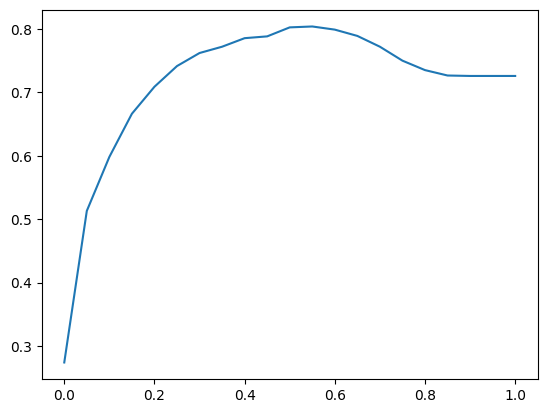

In [86]:
plt.plot(thresholds, scores)

- The image above tells us that if we are to chose an arbitrary threshold (model that predicst only churn == 1.0), it will give us 73% percent accuracy which is not far from the best threshold of 0.5. This means that we are nearly better off using this arbitrary model (model that is biased towards churn predictions only) 
- This is a clear issue of class imbalance. which leads the model to lee towards a specific prediction.


### Realisations
- we realised a dummy  model will give us quite good results due to class imbalance
- This implies if we predicted everyone is churning, our model will be quite good almost comparable to our best model.
- so we have to use a different way to evaluate the quality of our model.

# 4.3 Confusion Table

- Different types of errors and correct decisions
- Arranging them in a table

In [87]:


# customer reality
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)


# --> model predictions
t = 0.5
predict_positive = (y_pred>= t)
predict_negative = (y_pred < t)

#--> combinations
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

print(tp,tn,fp,fn)

confusion_matrix = np.array([
    [tp, fn],
    [fp, tn]
]
)

print(confusion_matrix)

211 920 103 175
[[211 175]
 [103 920]]


In [88]:
#Normalise

(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.15, 0.12],
       [0.07, 0.65]])

# 4.4 Precision and Recall
- Precision: Proportion of accurate(positive or negative) predictions. (It could also be proportion of positive predictions or proportion of negative predictions)
- Recall: Proportion of accurate positive instances(customer reality) i.e., proportion of customers who actually churned or going to churn
- F1 score: Harmonic mean of precision and recall

In [89]:
precision = tp / (tp + fp); print(precision.round(2), 'i.e,. 67% --> model made 33% unprecise predictions')

recall =  tp / (tp + fn); print(recall.round(2), 'i.e., 55% --> model failed to identify 45% of actual churners')

F1 = 2 * ((recall * precision) / (recall + precision)); print(F1.round(2))



0.67 i.e,. 67% --> model made 33% unprecise predictions
0.55 i.e., 55% --> model failed to identify 45% of actual churners
0.6


# 4.5 ROC CURVES 
- Evaluates tpr and fpr at different thresholds
  - TPR
  - FPR
  


In [90]:
tpr = tp / (tp + fn); print(tpr.round(2)) # 
fpr = fp/ (fp + tn); print(fpr.round(3))  # for all negative examples 10% are still predicted wrongly 


#-> Manual Implementation
thresholds = np.linspace(0, 1, 101)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t,tp, fp, fn, tn))

df_scores = pd.DataFrame(scores, columns = ['thresholds', 'tp', 'fp', 'fn', 'tn'])
df_scores
#df_scores[::10]


0.55
0.101


,thresholds,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,914,1,109
2,0.02,384,825,2,198
3,0.03,383,765,3,258
4,0.04,381,714,5,309
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [91]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,546,20,477,0.948187,0.533724
20,0.2,333,357,53,666,0.862694,0.348974
30,0.3,287,236,99,787,0.743523,0.230694
40,0.4,252,168,134,855,0.652850,0.164223
50,0.5,211,103,175,920,0.546632,0.100684
60,0.6,161,58,225,965,0.417098,0.056696
70,0.7,89,24,297,999,0.230570,0.023460
80,0.8,15,2,371,1021,0.038860,0.001955
90,0.9,0,0,386,1023,0.000000,0.000000


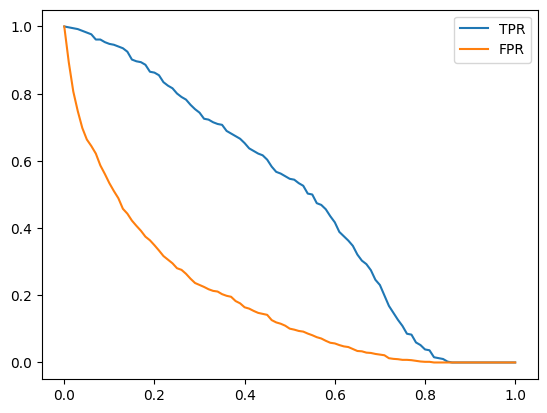

In [92]:
#plot 
plt.plot(df_scores.thresholds, df_scores.tpr, label = 'TPR')
plt.plot(df_scores.thresholds, df_scores.fpr, label = 'FPR')
plt.legend()

- We want the TPR curve to be as high as possible and FPR curve as low as possible

## Random Model

In [93]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [94]:
def tpr_fpr_dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)

    scores = []
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t,tp, fp, fn, tn))
        
    df_scores = pd.DataFrame(scores, columns = ['thresholds', 'tp', 'fp', 'fn', 'tn'])
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

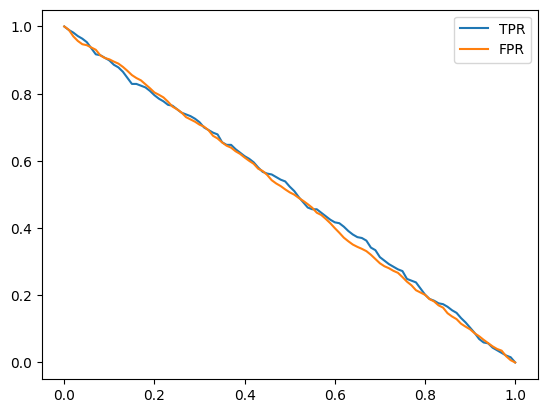

In [95]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
#df_rand[::10]
#plot 
plt.plot(df_rand.thresholds, df_rand.tpr, label = 'TPR')
plt.plot(df_rand.thresholds, df_rand.fpr, label = 'FPR')
plt.legend()

## Ideal Model 

# ROC with Scikit-Learn

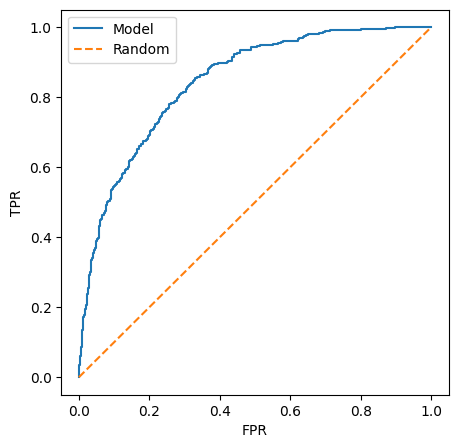

In [96]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize = (5,5))
#plt.plot(df_scores.fpr, df_scores.tpr, label = 'Model')
plt.plot(fpr, tpr, label = 'Model')
plt.plot([0,1], [0,1], label = 'Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()


#Use scikit learn to compute tpr and fpr. Then plot fpr vs tpr -> gives auc curve

# 4.6  AUC - ROC 
- Area under the ROC curve - useful metric
- Interpretation of AUC

In [107]:
from sklearn.metrics import auc

auc(fpr,tpr) #fpr = x, tpr=y   This tpr & tpr used more thresholds -- best 

0.8435744711024671

In [106]:
auc(df_scores.fpr, df_scores.tpr)  #manual tpr & fpr

0.8437656693966239

In [108]:
# --> Area under Curve
# --> AUC tells us the probability of a randomly selected positive example score being > than a randomly selected negative example score
# --> Tells us how well our model can order customers

from sklearn.metrics import roc_auc_score

roc_auc_score (y_val, y_pred)

0.8435744711024671

# 4.7 Cross-Validation
- Evaluating the same model on different subsets of the data
- Getting the average prediction and the spread within predictions

In [162]:
# --> write a function to prepare train data to fit a logistic regression model

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=10000).fit(X_train, y_train)

    return dv, model

In [163]:
dv, model = train(df_train, y_train, C=0.001)

In [164]:
# Write a function to predict with our trained model. 
# 1. prepare the validation data and predict the soft predictions.

def predict(df_val, dv, model):
    dicts_val = df_val[categorical + numerical].to_dict(orient = 'records')

    X_val = dv.transform(dicts_val)
    y_pred = model.predict_proba(X_val)[:,1] #pick the churn probability columns
    
    return y_pred

In [165]:
y_pred = predict(df_val, dv, model)

In [166]:
#Create the kfold 
from sklearn.model_selection import KFold

In [167]:
kfold = KFold(n_splits = 10 , shuffle = True ,random_state = 1 ) #shift + tab give the top tip helper

In [168]:
train_idx, val_idx = next(kfold.split(df_full_train))  
#returns two arrays (first ine is indicess for train, and second is indices for validation)

In [169]:
len(train_idx), len(val_idx), len(df_full_train)

(5070, 564, 5634)

In [170]:
#use iloc to select the train_idx for our train data same for idx
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [134]:
#install tqdm to see the iterations
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [171]:
from tqdm.auto import tqdm

In [197]:
# loop for the cv with train and predict functions
#--> for each C we perform 5-fold cv and record average auc score in the scores object
#--> output all the average aucs when each C is used.
#--> select the best

cv_results = {}

n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]): 
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        #add the training function - it accepts df_train and y_train
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
    cv_results[C] = np.mean(scores)

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.008
C=0.1 0.842 +- 0.007
C=0.5 0.842 +- 0.007
C=1 0.842 +- 0.007
C=5 0.842 +- 0.007
C=10 0.842 +- 0.007


In [199]:
best_C = max(cv_results, key = cv_results.get)

print(f"Best C: {best_C} with AUC: {cv_results[best_C]:.4f}")

Best C: 0.5 with AUC: 0.8418


In [200]:
pd.DataFrame([cv_results], index = ['auc'])

,0.001,0.010,0.100,0.500,1.000,5.000,10.000
auc,0.824828,0.839835,0.841753,0.841846,0.841784,0.841689,0.84176


In [201]:
## train on full train data using the best C(regularization)
dv, model = train(df_full_train, df_full_train.churn.values, C=0.5)

#predict on held out test data
y_pred = predict(df_test, dv, model)

#auc on test data
auc = roc_auc_score(y_test, y_pred)
auc

#AUC is a bit higher than what we had during cv 
#AUC is how well our model separates positive classes from negative classes

0.8583490417844801

# 4.8 Summary 
- Metrics : a single number that describes the performance of a model
- Accuracy : a fraction of correct answers; sometimes misleading when classes are imbalanced.
- Precision and recall: Less misleading when classes are imbalanced.
  - Precision -> proportion of precise positive prediction (tp/(tp+fp)) -> want to reduce fp
  - Recall -> proportion of actual churners are model is able to identify (tp/(tp+fn)) -> want to reduce fn
- ROC Curve : evaluate the tpr and fpr (model performance at diff thresholds) - Good for class imbalance
- K-Fold CV: more robust and reliable way of obtaining the best performance